In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install cvtColor

ERROR: Could not find a version that satisfies the requirement cvtColor (from versions: none)
ERROR: No matching distribution found for cvtColor


In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image_path = '1.png'
image = cv2.imread(image_path)

# Convert the image to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply GaussianBlur to reduce noise and improve edge detection
blurred = cv2.GaussianBlur(gray, (9, 9), 2)

# Use HoughCircles to detect circles with adjusted parameters
circles = cv2.HoughCircles(
    blurred,
    cv2.HOUGH_GRADIENT, dp=1.2, minDist=200,
    param1=50, param2=30, minRadius=50, maxRadius=200
)

# Create a copy of the original image for drawing
output_image = image.copy()

# If circles are detected, draw the largest one
if circles is not None:
    circles = np.round(circles[0, :]).astype("int")
    # Draw each circle
    for (x, y, r) in circles:
        # Draw the outer circle
        cv2.circle(output_image, (x, y), r, (0, 255, 0), 4)
        # Draw the center of the circle
        cv2.circle(output_image, (x, y), 5, (0, 128, 255), -1)

# Save the result to display it
output_path = "detected_circles.png"
cv2.imwrite(output_path, output_image)

# Display the result
plt.figure(figsize=(8, 8))
plt.imshow(cv2.cvtColor(output_image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()


error: OpenCV(4.8.0) /io/opencv/modules/imgproc/src/color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cvtColor'


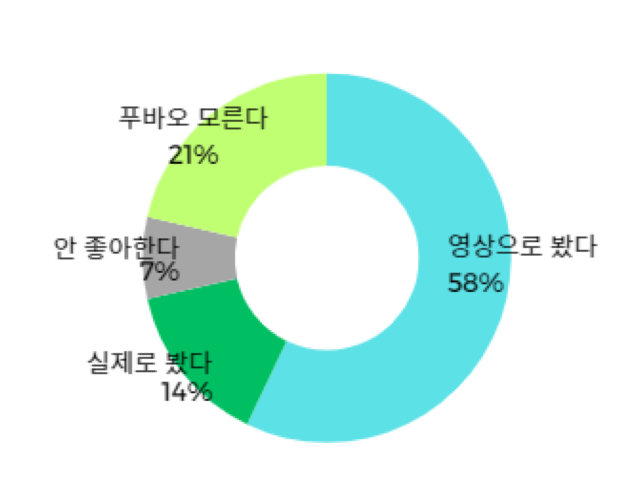

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# 이미지 로드
image_path = '1.png'  # 실제 이미지 파일 경로로 변경
image = cv2.imread(image_path)

# 이미지를 그레이스케일로 변환
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# 가우시안 블러 적용
blurred = cv2.GaussianBlur(gray, (5, 5), 0)

# Canny 엣지 검출
edges = cv2.Canny(blurred, 50, 150)

# HoughLinesP를 사용하여 직선 검출
lines = cv2.HoughLinesP(edges, 1, np.pi / 180, threshold=100, minLineLength=50, maxLineGap=10)

# 원본 이미지에 직선과 끝점 그리기
output_image = image.copy()
if lines is not None:
    for line in lines:
        x1, y1, x2, y2 = line[0]
        # 직선 그리기
        cv2.line(output_image, (x1, y1), (x2, y2), (0, 255, 0), 2)
        # 끝점 그리기
        cv2.circle(output_image, (x1, y1), 5, (0, 0, 255), -1)
        cv2.circle(output_image, (x2, y2), 5, (0, 0, 255), -1)

# 결과 이미지 저장
output_path = "detected_lines_and_endpoints.png"
cv2.imwrite(output_path, output_image)

# 결과 이미지 표시
plt.figure(figsize=(8, 8))
plt.imshow(cv2.cvtColor(output_image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()


In [ ]:
#----------

In [ ]:
bar = "/content/33.png"

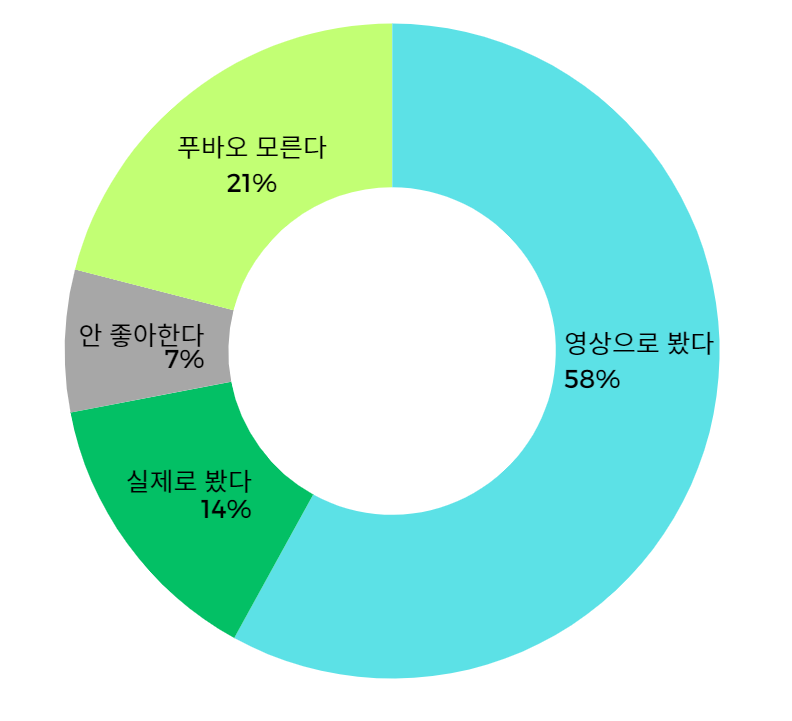

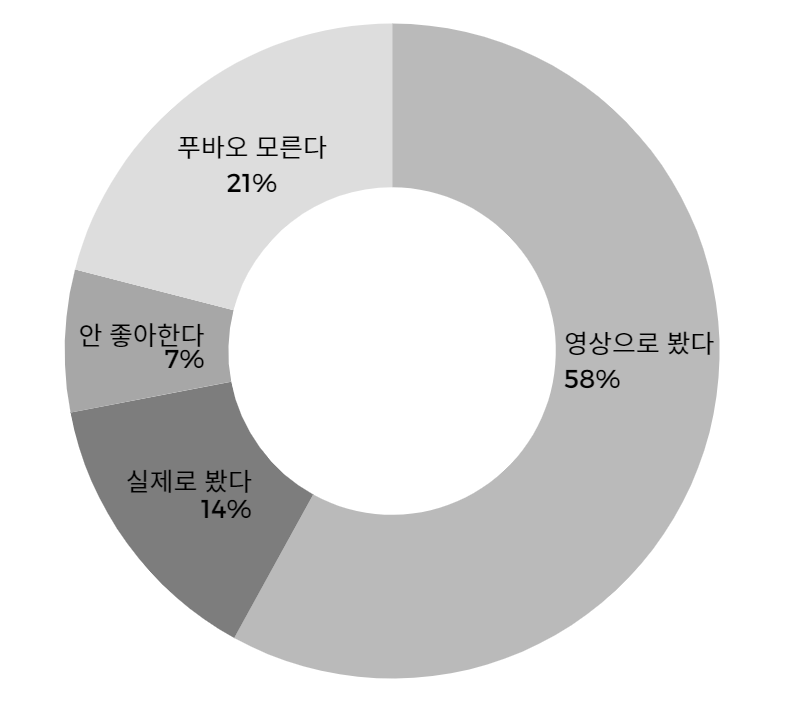

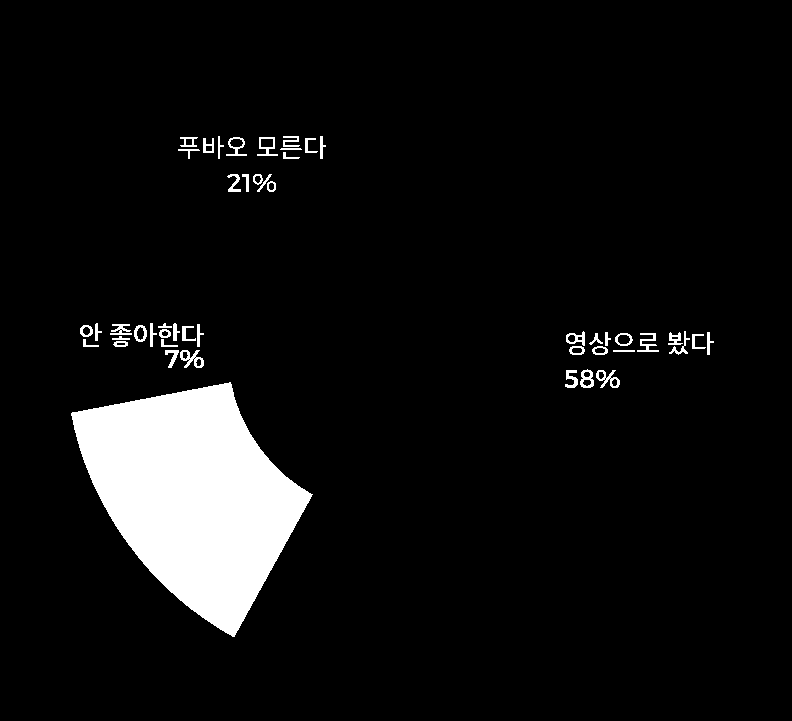

In [ ]:
import cv2
from google.colab.patches import cv2_imshow

# 이미지 로드
image = cv2.imread(bar)

# 이미지를 그레이스케일로 변환
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# 이미지 이진화
_, binary = cv2.threshold(gray, 150, 255, cv2.THRESH_BINARY_INV)

# 이미지 표시
cv2_imshow(image)
cv2_imshow(gray)
cv2_imshow(binary)

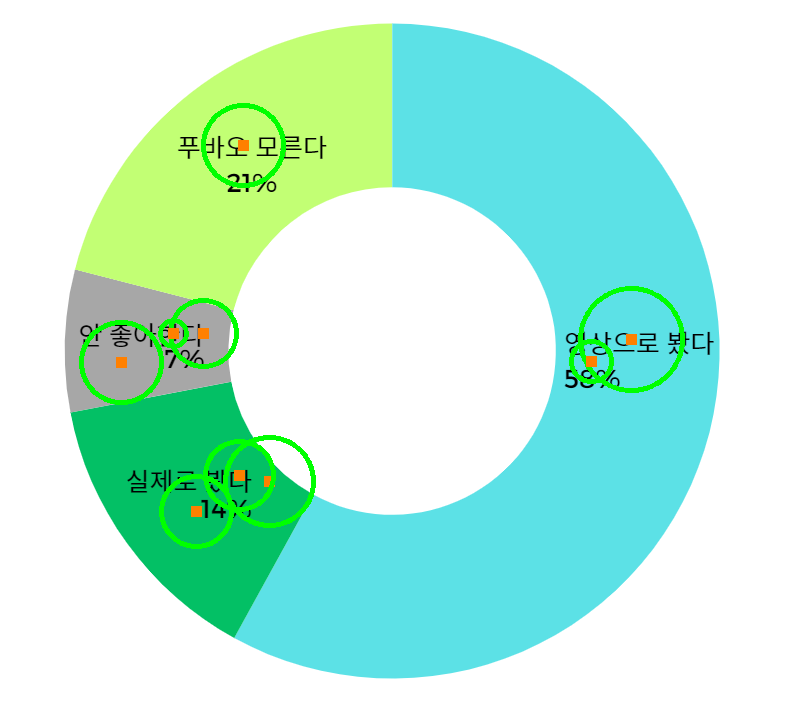

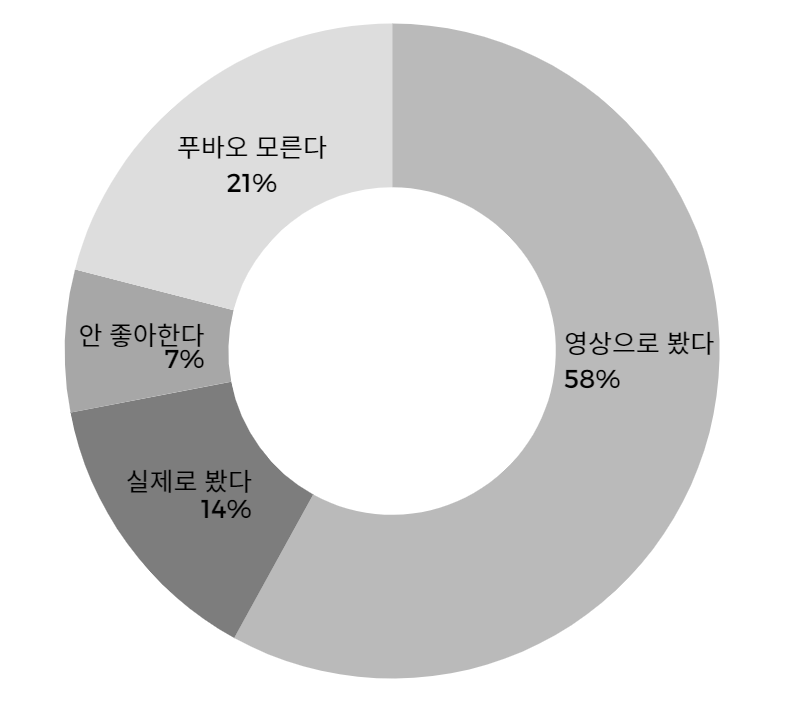

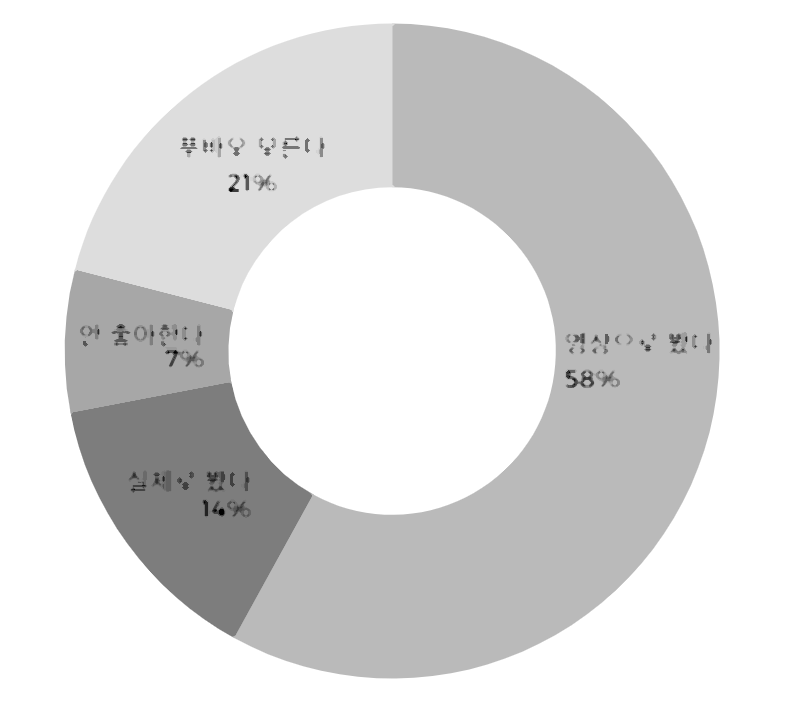

In [ ]:
from google.colab.patches import cv2_imshow
import cv2
import numpy as np

# 이미지 로드
image = cv2.imread('/content/33.png')

# 이미지를 그레이스케일로 변환
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# 블러를 사용하여 노이즈 제거
blurred = cv2.medianBlur(gray, 5)

# 허프 원 변환을 사용하여 원 검출
circles = cv2.HoughCircles(blurred, cv2.HOUGH_GRADIENT, dp=1.2, minDist=30,
                            param1=50, param2=30, minRadius=10, maxRadius=100)

# 검출된 원을 원본 이미지에 그리기
if circles is not None:
    circles = np.round(circles[0, :]).astype("int")
    for (x, y, r) in circles:
        cv2.circle(image, (x, y), r, (0, 255, 0), 4)
        cv2.rectangle(image, (x - 5, y - 5), (x + 5, y + 5), (0, 128, 255), -1)

# 결과 표시
cv2_imshow(image)
cv2_imshow(gray)
cv2_imshow(blurred)


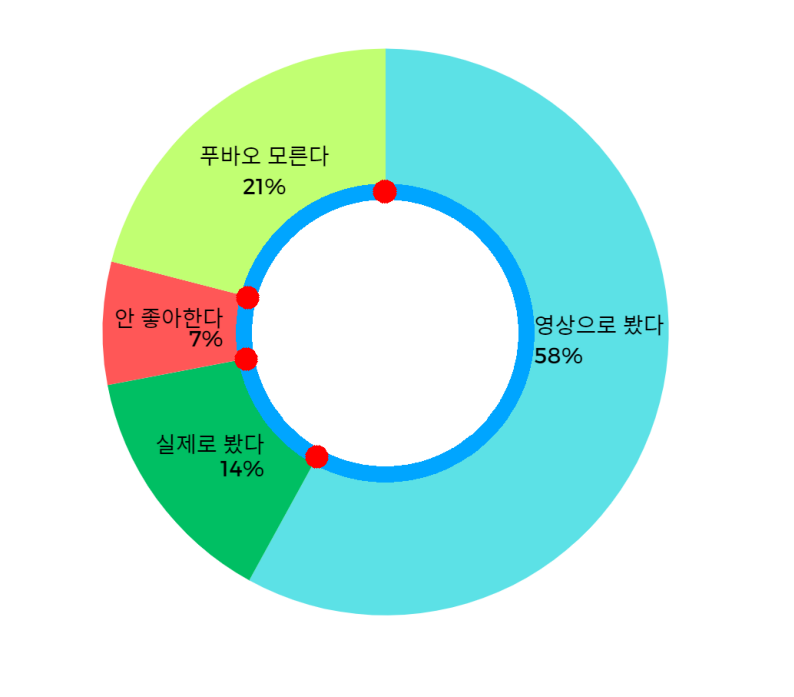

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# 이미지 로드
image_path = '5.png'
image = cv2.imread(image_path)

# 이미지를 그레이스케일로 변환
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# 가우시안 블러 적용
blurred = cv2.GaussianBlur(gray, (5, 5), 0)

# HoughCircles를 사용하여 원 검출
circles = cv2.HoughCircles(blurred, cv2.HOUGH_GRADIENT, dp=1.2, minDist=100, param1=100, param2=30, minRadius=175, maxRadius=200)

# 원본 이미지에 원을 그리기
output_image = image.copy()

# 도넛 차트의 외곽선을 원으로 검출
if circles is not None:
    circles = np.round(circles[0, :]).astype("int")
    outer_circle = max(circles, key=lambda c: c[2])
    inner_circle = min(circles, key=lambda c: c[2])
    (x, y, outer_r) = outer_circle
    (_, _, inner_r) = inner_circle

    # 외곽 원 그리기
    cv2.circle(output_image, (x, y), outer_r, (127,255,100), 2)
    # 내부 원 그리기
    cv2.circle(output_image, (x, y), inner_r, (255, 165, 0), 20)

    # 섹션의 각도 계산 (도넛 차트의 각 섹션이 차지하는 비율)
    sections = [58, 14, 7, 21]  # 각 섹션의 백분율
    start_angle = -90  # 시작 각도를 12시 방향으로 설정 (시계 방향으로 그릴 것이므로)
    angles = np.cumsum([start_angle] + [section * 3.6 for section in sections])

    # 각 섹션의 경계점 계산 및 그리기 (시계 방향)
    for angle in angles:
        radians = np.deg2rad(angle)
        edge_x = int(x + inner_r * np.cos(radians))
        edge_y = int(y + inner_r * np.sin(radians))
        cv2.circle(output_image, (edge_x, edge_y), 5, (0, 0, 255), 20)

# 결과 이미지 저장
output_path = "/mnt/data/annotated_image_with_edges.png"
cv2.imwrite(output_path, output_image)

# 결과 이미지 표시
plt.figure(figsize=(10, 10))
plt.imshow(cv2.cvtColor(output_image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()
# HoughCircles를 사용하여 원 검출 값 변경좀 해줘. 원본 이미지를 수정했어.